In [6]:
!pip install memory_profiler

You should consider upgrading via the 'c:\users\rakti\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [7]:
#Importing the required libraries

import sklearn  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from memory_profiler import profile
import timeit

In [37]:
#data_df = pd.read_csv("bank-additional-full.csv", sep=';')  #loading the csv file
#data_df.head()

In [9]:
import os
path="C:/"
d=os.path.join(path,"Users/","rakti/","Downloads/","bank-data/","bank-data/","bank-additional-full.csv")
data_df = pd.read_csv(d, sep=';')  #loading the csv file
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
data_df.describe(include='object')   #to summarise the categorical attributes


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
data_df.describe()    #to summarise the numeric attributes

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Visualisation

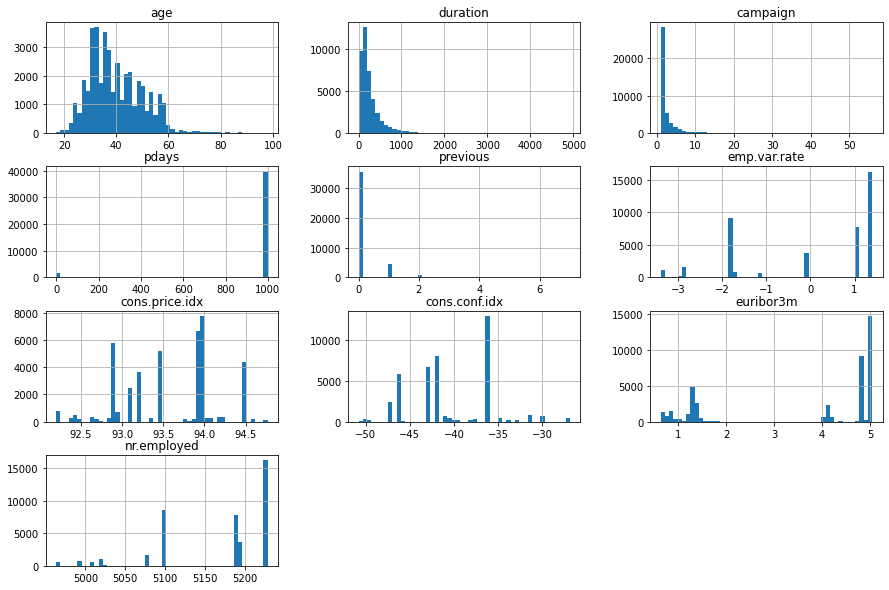

In [12]:
data_df.hist(bins=50,figsize=(15,10))   #plots the graph of all the numeric attributes
plt.show()

<AxesSubplot:xlabel='default', ylabel='count'>

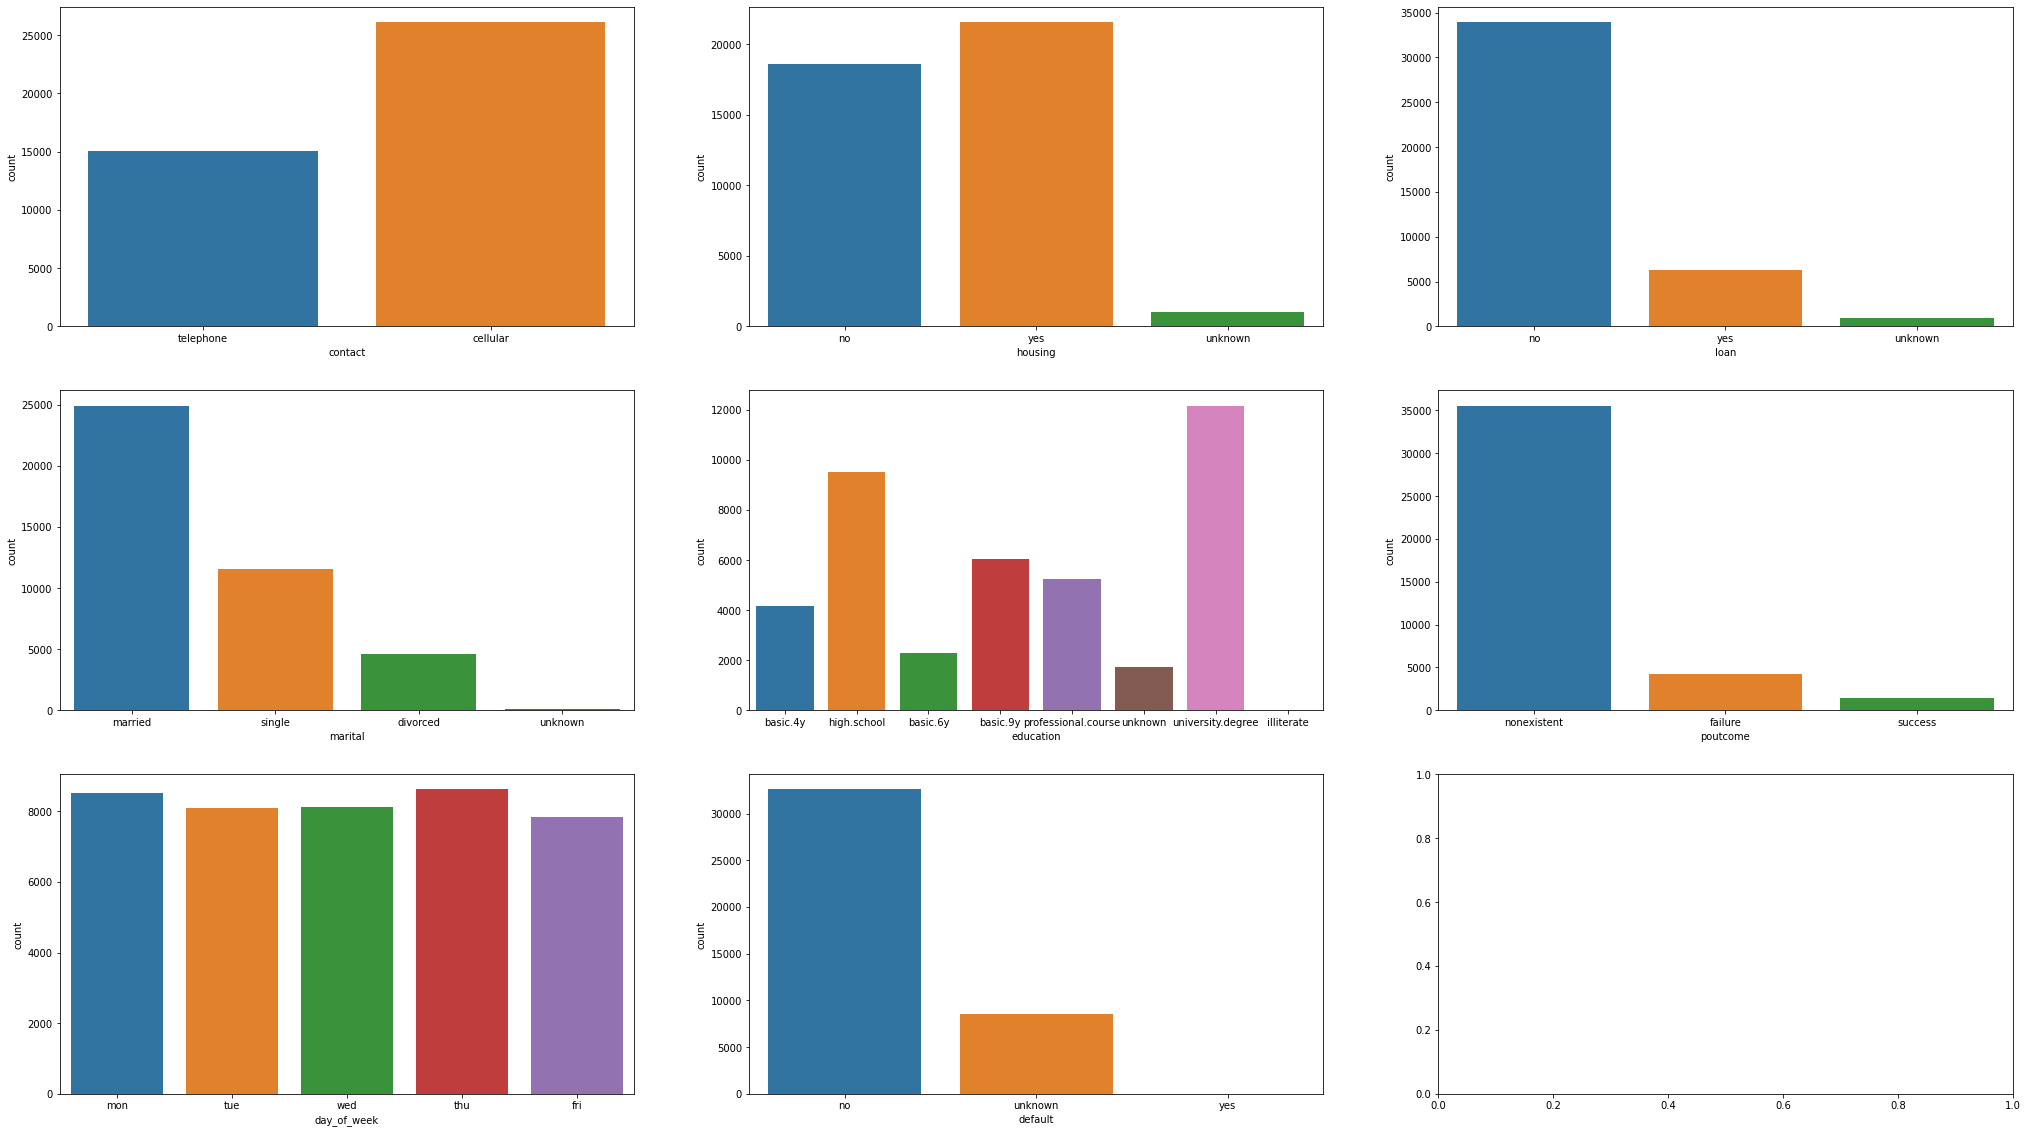

In [13]:
#to plot the categorical attribute

fig, ax = plt.subplots(3,3,figsize=(35,20))
sns.countplot(x="contact",data=data_df,ax=ax[0][0])
sns.countplot(x="housing",data=data_df,ax=ax[0][1])
sns.countplot(x="loan",data=data_df,ax=ax[0][2])
sns.countplot(x="marital",data=data_df,ax=ax[1][0])
sns.countplot(x="education",data=data_df,ax=ax[1][1])
sns.countplot(x="poutcome",data=data_df,ax=ax[1][2])
sns.countplot(x="day_of_week",data=data_df,ax=ax[2][0])
sns.countplot(x="default",data=data_df,ax=ax[2][1])

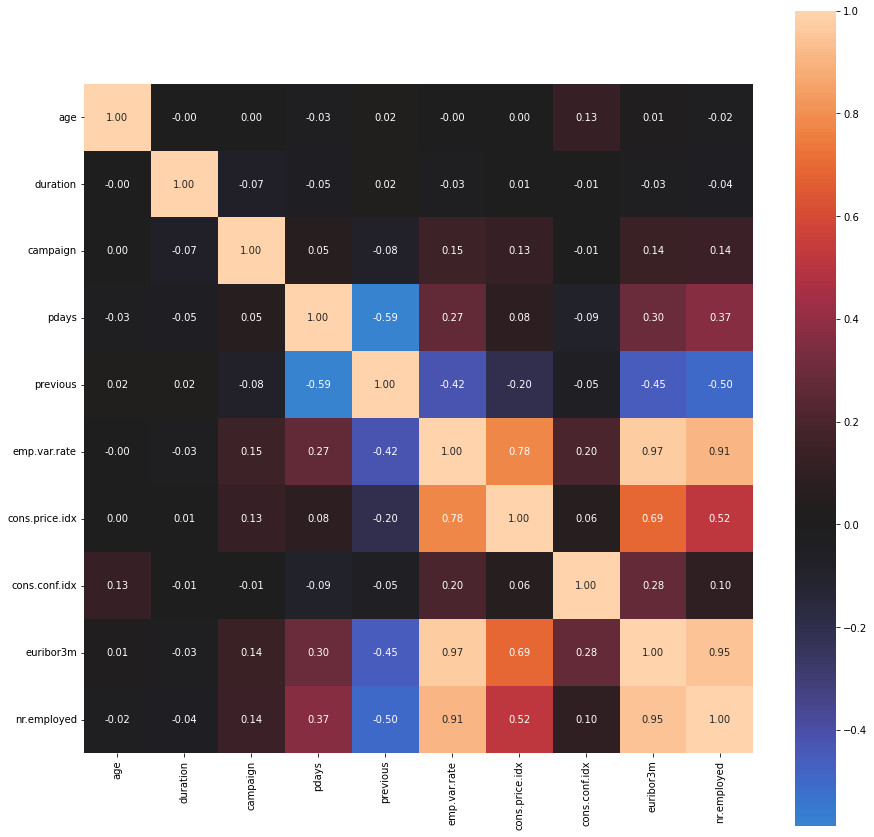

In [14]:
#Plots the heatmap of numeric attributes

correlations = data_df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.show()

# Data Cleaning

From the above graphs we can see that our target variable is relatively invariant about the variables **'pdays'**, **'day_of_week'** and **'housing'** so we shall drop these attributes.

In [15]:
data_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

The variable **'default'** has mostly all values as no or unknown so we shall drop it as well.

In [16]:
data_df = data_df[data_df['marital']!='unknown']
data_df = data_df[data_df['education']!='unknown']
data_df = data_df[data_df['job']!='unknown']
data_df = data_df[data_df['loan']!='unknown']

In [17]:
data_df = data_df.drop(["day_of_week",'pdays','default','housing'],axis=1) 

data_df = pd.get_dummies(data_df,columns=['marital','loan','poutcome','contact']) #One Hot Encoding
#data_df = data_df.drop(['loan_unknown','marital_unknown'],axis=1)  #Remove the columns for unknown values
data_df.head()

,age,job,education,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,housemaid,basic.4y,may,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
1,57,services,high.school,may,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
2,37,services,high.school,may,226,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
3,40,admin.,basic.6y,may,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
4,56,services,high.school,may,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,0,1


In [18]:
data_df["y"]=data_df["y"].replace("no",0)  #converting the non-numeric target variable to binary
data_df["y"]=data_df["y"].replace("yes",1)

#Performing Label Encoding on categorical variables which have more than 3 categories.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_df['job'] = le.fit_transform(data_df['job'])
data_df['education'] = le.fit_transform(data_df['education'])
data_df['month'] = le.fit_transform(data_df['month'])
data_df.head()

,age,job,education,month,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,marital_divorced,marital_married,marital_single,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,contact_cellular,contact_telephone
0,56,3,0,6,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
1,57,7,3,6,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
2,37,7,3,6,226,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
3,40,0,1,6,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,0,1
4,56,7,3,6,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,0,1


# Train Test Split

In [19]:
Y=data_df['y']
data_X=data_df.drop(['y'],axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(data_X,Y, test_size=0.3,random_state=51)

# Decision Tree Classifier

We have tried to maximise **recall_score** and accordingly chosen the paramters such as depth of the tree and maximum number of leaf nodes in the tree for our Decision Tree Classifier.

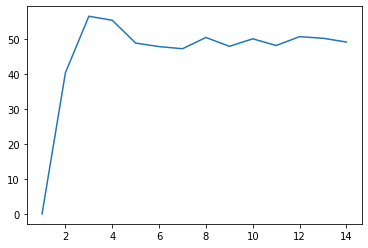

In [20]:
#to find the best depth
dt_dep=[] #list to store the recall_score for different depths
for i in range(1,15):
  clf=DecisionTreeClassifier(max_depth=i,random_state=51)
  clf.fit(X_train, Y_train)
  Y_pred=clf.predict(X_test)
  dt_dep.append(metrics.recall_score(Y_test,Y_pred)*100)

k=dt_dep.index(max(dt_dep))+1  #best depth
plt.plot(range(1,15),dt_dep)
plt.show()

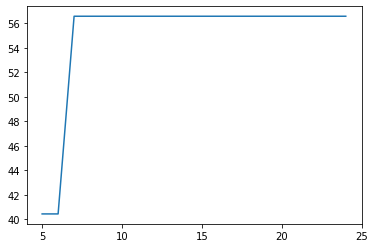

In [21]:
#to find the best number of leaf nodes
dt_leaf=[] #list to store the recall_score for different number of leaf nodes
for i in range(5,25):
  clf=DecisionTreeClassifier(max_depth=k,max_leaf_nodes=i,random_state=51)
  clf.fit(X_train,Y_train)
  Y1_pred=clf.predict(X_test)
  dt_leaf.append(metrics.recall_score(Y_test,Y1_pred)*100)   #use recall_score

l=dt_leaf.index(max(dt_leaf))+5  #best number of leaf nodes
plt.plot(range(5,25),dt_leaf)
plt.xticks([5,10,15,20,25])
plt.show()

In [22]:
start_dt = timeit.default_timer()

Decision Tree Classifier took0.071684399999981seconds
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10173
           1       0.57      0.49      0.53      1301

    accuracy                           0.90     11474
   macro avg       0.75      0.72      0.74     11474
weighted avg       0.89      0.90      0.90     11474



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


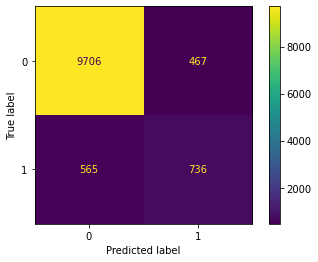

In [23]:
#Decision Tree Classifier with the best value of depth and number of leaf nodes.

clf_best=DecisionTreeClassifier(max_depth=k,max_leaf_nodes=i,random_state=51)
clf_best.fit(X_train,Y_train)  #fitting the model
Y1_pred=clf_best.predict(X_test)  #predicting the values on test set


stop_dt = timeit.default_timer()
execution_time_dt = stop_dt - start_dt
print("Decision Tree Classifier took"+str(execution_time_dt)+'seconds')

#plotting the confusion matrix to get the different metrics

from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(clf_best, X_test, Y_test)
print(classification_report(Y_test, Y_pred))

In [24]:

%load_ext memory_profiler

from memory_profiler import profile

%memit clf_best.fit(X_train,Y_train)

peak memory: 236.40 MiB, increment: 0.67 MiB


# Plotting a Decision Tree

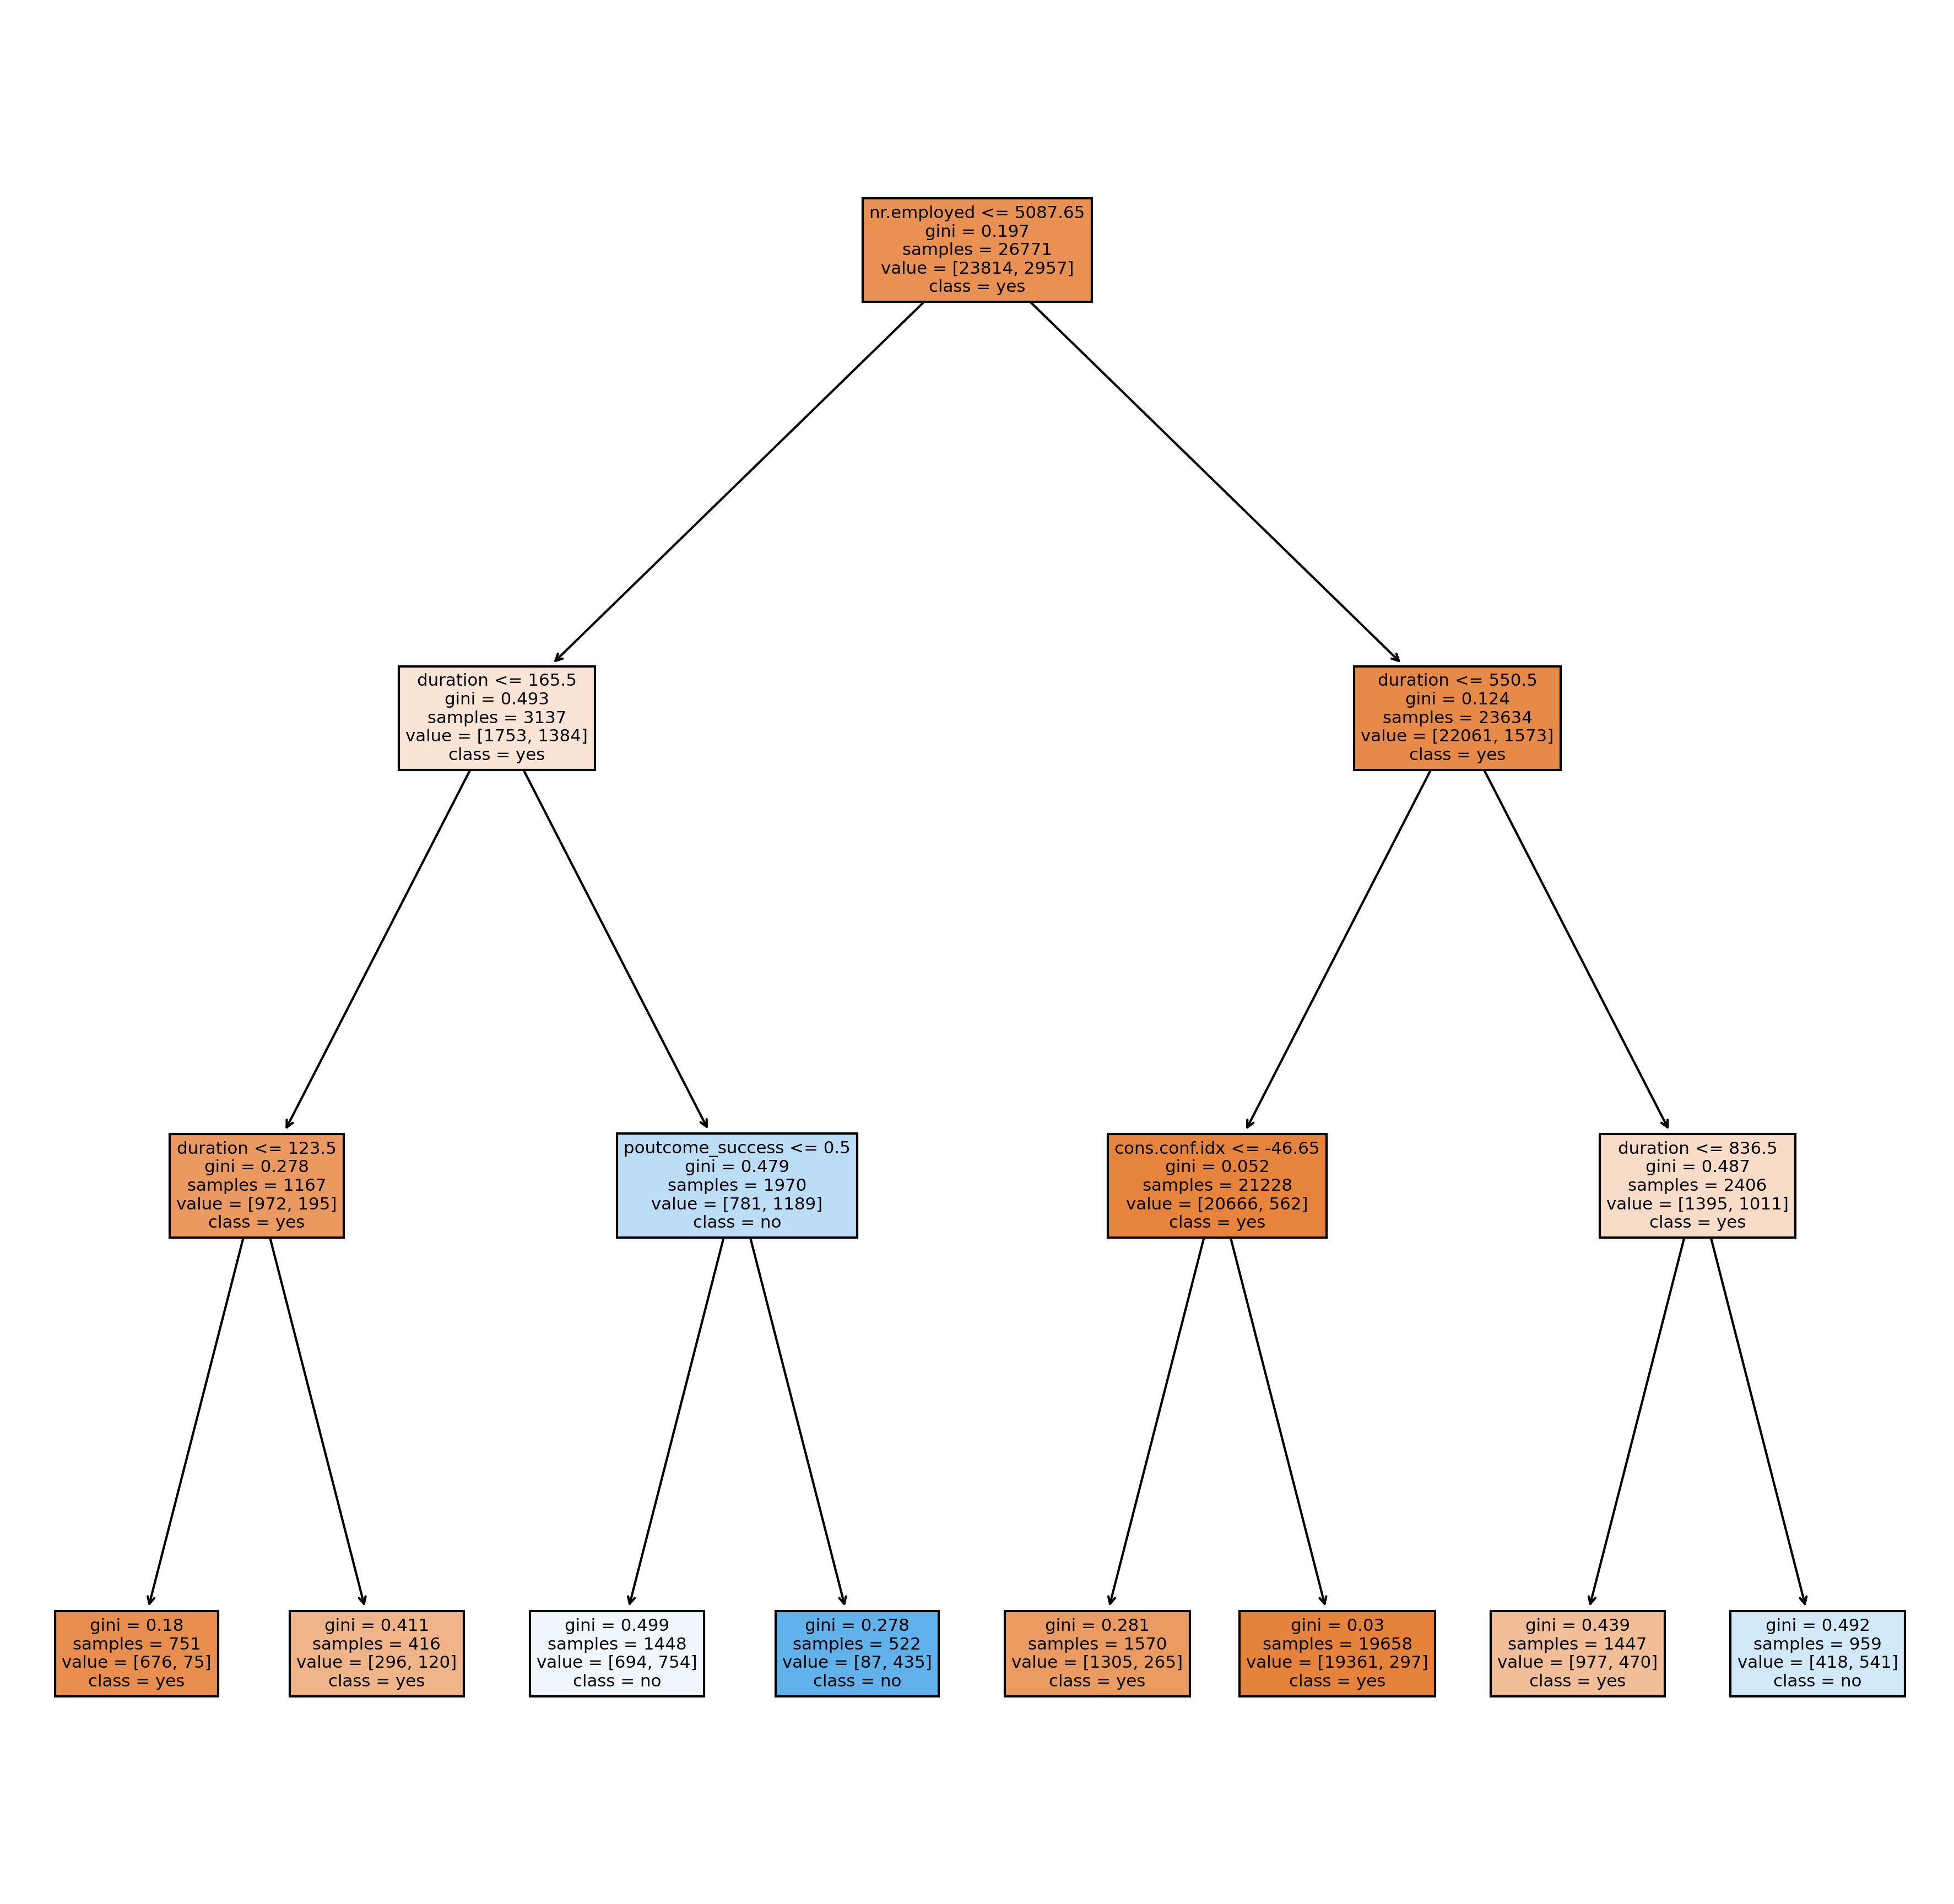

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
feat=[]
for i in X_train.columns:
  feat.append(i)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
sklearn.tree.plot_tree(clf_best,
               feature_names = feat, 
               class_names=["yes","no"],
               filled = True)
fig.savefig('imagename.png')

# Random Forest Classifier

We have tried to maximise **recall_score** and accordingly chosen the parameters such as maximum depth of any tree and number of trees for our Random Forest Classifier.

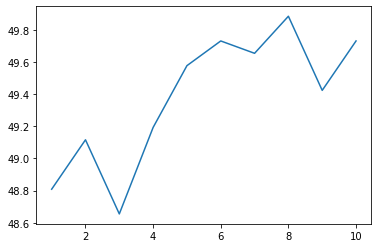

In [26]:
#to find the best number of trees

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rf_est=[]  #list to store the recall_score for different number of trees
for i in range(100,1100,100):
  clf=RandomForestClassifier(n_estimators=i,bootstrap=True,oob_score=False,random_state=51)
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  rf_est.append(metrics.recall_score(Y_test,Y_pred)*100)   #recall_score
k=rf_est.index(max(rf_est))+1
plt.plot(range(1,11),rf_est)
plt.show()


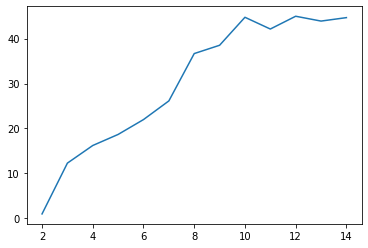

In [27]:
#to find the best maximum depth of any tree

rf_dep=[]  #list to store the recall_score for different depths
for i in range(2,15):
  clf=RandomForestClassifier(n_estimators=k,bootstrap=True,oob_score=False,max_depth=i,random_state=51)
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  rf_dep.append(metrics.recall_score(Y_test,Y_pred)*100)
l=rf_dep.index(max(rf_dep))+2
plt.plot(range(2,15),rf_dep)
plt.show()

In [28]:
start_rf = timeit.default_timer()

Random Forest Classifier took0.24783930000000964seconds
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10173
           1       0.67      0.45      0.54      1301

    accuracy                           0.91     11474
   macro avg       0.80      0.71      0.74     11474
weighted avg       0.90      0.91      0.90     11474



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


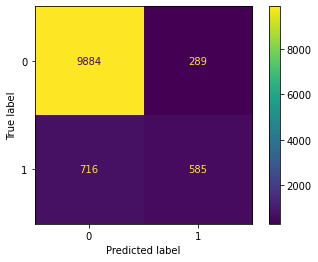

In [29]:
#Random Forest Classifier with the best value of depth and number of trees.

rf_clf_best=RandomForestClassifier(n_estimators=k,bootstrap=True,oob_score=False,max_depth=l,random_state=51)
rf_clf_best.fit(X_train,Y_train)   #fitting the model
Y_pred_rf=rf_clf_best.predict(X_test)  #predicting the values on test set

stop_rf = timeit.default_timer()
execution_time_rf = stop_rf - start_rf
print("Random Forest Classifier took"+str(execution_time_rf)+'seconds')

#plotting the confusion matrix to get the different metrics
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(rf_clf_best, X_test, Y_test)

print(classification_report(Y_test, Y_pred_rf))

In [30]:
%memit rf_clf_best.fit(X_train,Y_train)

peak memory: 291.04 MiB, increment: 2.25 MiB


# Gaussian Naive Bayes Classifier

In [31]:
start_nb = timeit.default_timer()

Naive Bayes Classifier took 226.52 seconds
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     10173
           1       0.37      0.58      0.45      1301

    accuracy                           0.84     11474
   macro avg       0.65      0.73      0.68     11474
weighted avg       0.88      0.84      0.85     11474



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


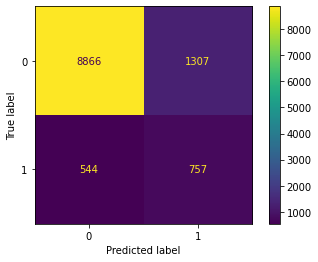

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)     #fititng the model
Y_pred_nb=nb_clf.predict(X_test)   #predicting the values on test set

stop_nb = timeit.default_timer()
execution_time_nb = stop_nb - start_nb
print("Naive Bayes Classifier took {0:.2f} seconds".format(execution_time_nb))

#plotting the confusion matrix to get the different metrics
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(nb_clf, X_test, Y_test)
print(classification_report(Y_test, Y_pred_nb))

In [35]:
%memit nb_clf.fit(X_train,Y_train)

peak memory: 297.84 MiB, increment: 8.50 MiB


# Voting Classifier

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10173
           1       0.60      0.53      0.56      1301

    accuracy                           0.91     11474
   macro avg       0.77      0.74      0.75     11474
weighted avg       0.90      0.91      0.90     11474



c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


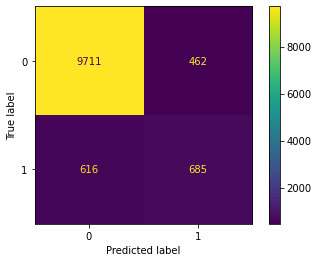

In [36]:
from sklearn.ensemble import VotingClassifier
vot_clf=VotingClassifier(estimators=[('dt',clf_best),('rf',rf_clf_best),('gnb',nb_clf)],voting='soft')
vot_clf=vot_clf.fit(X_train,Y_train)
v_pred=vot_clf.predict(X_test)


from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(vot_clf, X_test, Y_test)
print(classification_report(Y_test, v_pred))